In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis # PIL의 Image와 이름이 동일하여 다르게 짓는다
from PIL import Image # PIL은 pip install pillow로 설치
import numpy as np

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # 객체를 만들 때 스케일링 수준을 결정
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

folder = '/content/gdrive/MyDrive/pytest_img/cats_dogs'
train_dir = folder+"/train"
validation_dir = folder+"/validation"
test_dir = folder+"/test"

In [3]:
train_generator = train_datagen.flow_from_directory(
train_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

validation_generator = validation_datagen.flow_from_directory(
validation_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

test_generator = test_datagen.flow_from_directory(
test_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(20, 20, 3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                        

In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/30
 1/20 [>.............................] - ETA: 17s - loss: 0.6696 - acc: 0.5000

20/20 [==============================] - 1s 27ms/step - loss: 0.6696 - acc: 0.5000 - val_loss: 1.3182 - val_acc: 0.5000


In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc)
print()
print('Validation Accuracy of each epoch:', val_acc)

Accuracy of each epoch: [0.5]

Validation Accuracy of each epoch: [0.5]


In [16]:
print('Loss of each epoch:',np.round(loss,3))
print()
print('Validation Loss of each epoch:', np.round(val_loss,3))

Loss of each epoch: [0.67]

Validation Loss of each epoch: [1.318]


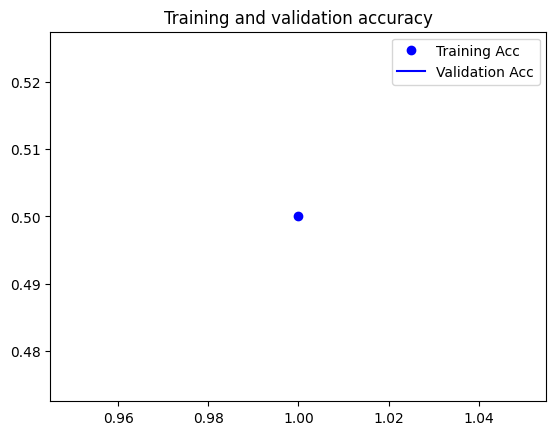

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

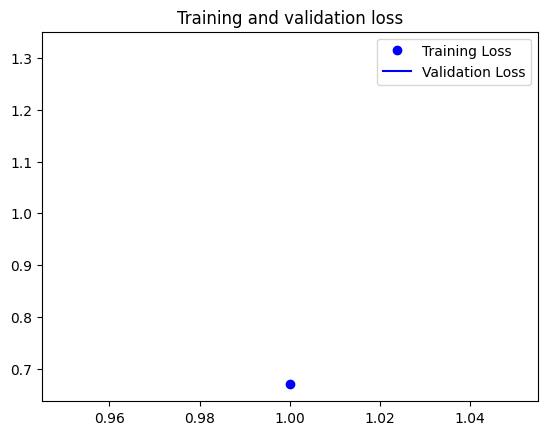

In [18]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
model.predict(test_generator)

1/1 [==============================] - 0s 388ms/step


array([[0.06383102],
       [0.05783828],
       [0.11523572],
       [0.05353347],
       [0.11865062],
       [0.08381694],
       [0.09945595],
       [0.10756684],
       [0.09289658],
       [0.05118367],
       [0.16321132],
       [0.16120572],
       [0.11205509],
       [0.08292047],
       [0.07966041],
       [0.14481713],
       [0.05755951],
       [0.07501313],
       [0.13332179],
       [0.07870764]], dtype=float32)

In [20]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [21]:
from keras.utils import image_dataset_from_directory

folder = '/content/gdrive/MyDrive/pytest_img/cats_dogs'

train_dir = folder+"/train"
validation_dir = folder+"/validation"
test_dir = folder+"/test"

train_dataset = image_dataset_from_directory(directory=train_dir, image_size=(20, 20),batch_size=100)
validation_dataset = image_dataset_from_directory(directory=validation_dir,image_size=(20, 20), batch_size=100)
test_dataset = image_dataset_from_directory(directory=test_dir, image_size=(20, 20),batch_size=100)

Found 20 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# rescale: 스케일링 수준
# rotation_range: 사진을 회전시킬 각도의 범위
# width_shift_range: 수평으로 평행 이동 시킬 범위 (넓이의 비율)
# height_shift_range: 수직으로 평행 이동 시킬 범위 (높이의 비율)
# shear_range: rotation_range로 회전할 때 증가시킬 y축 방향의 각도
# zoom_range: 사진을 확대할 범위
# horizontal_flip: 좌우 반전
# 상하반전의 vertical_flip도 있으나, 성능이 좋아지지 않을 가능성이 있다
# 글씨가 있는 경우에는 좌우반전이나 상하반전을 해서는 안된다

In [23]:
train_cats_dir = folder+"/train/cats/"
file = os.listdir(train_cats_dir)[0]
file_path = os.path.join(train_cats_dir,file)
print(file_path)

from keras.preprocessing import image
img = image.load_img(file_path, target_size=(120,120))
# load_img() 함수는 이미지를 PIL(Python Image Library) 파일로 변환한다
# img_to_array() 함수는 PIL 파일을 넘파이 배열로 변환한다
x= image.img_to_array(img)
x=x.reshape(1,120,120,3) # 앞에 축을 하나 추가한다
print(x.shape)

/content/gdrive/MyDrive/pytest_img/cats_dogs/train/cats/cat.0.jpg
(1, 120, 120, 3)


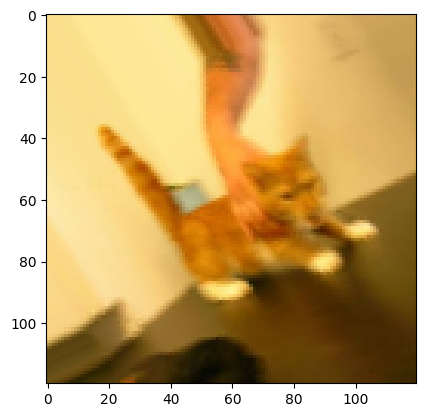

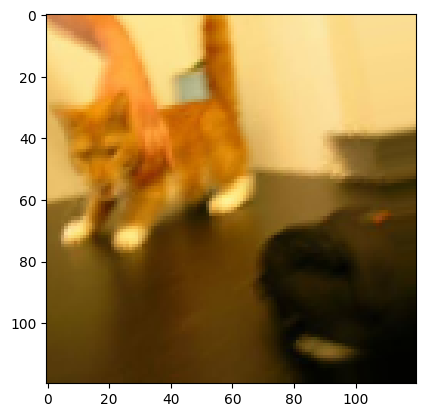

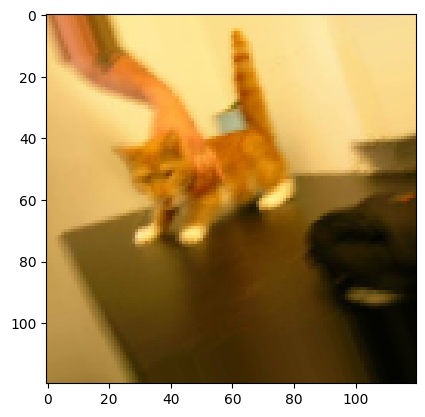

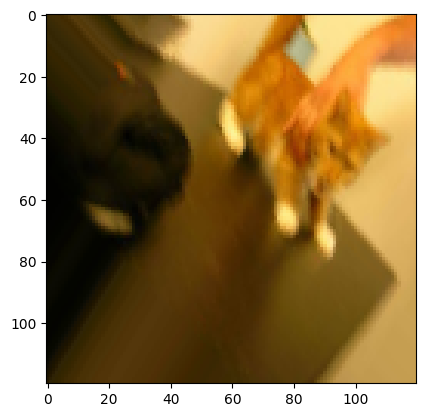

In [28]:
import matplotlib.pyplot as plt
# ImagaDataGenerator.flow(x, batch_size=1) 으로 데이터를 하나씩 넣는다
# array_to_img() 함수는 넘파이 배열 상태로 되어 있는 것을 다시 PIL 타입 이미지로 변환
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i) # i 번째 그림을 그릴 준비를 한다
  plt.imshow(image.array_to_img(batch[0])) # 이미지 생성
  i += 1
  # 4장씩 만든다
  # flow() 함수를 이용하면 이와 같이 원하는 양의 데이터 증강이 가능하다
  if i%4 == 0:
    break

plt.show()

In [31]:
#대량의 이미지를 처리할 때는 flow_from_directory()를 사용한다
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# validation과 test 데이터는 증강을 하면 안된다
# 여기서는 flow_from_directory()를 이용할 것이며,
# 한 batch 마다 하나의 증강된 이미지가 생성된다 (batch_size 100인 경우, 100장 당 1장)
# 따라서 2000 data / 100 batch_size = 20 aug. images
# 100 epoch면, 20 aug. images x 100 epochs = 2000 aug. images

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
folder = '/content/gdrive/MyDrive/pytest_img/cats_dogs'
train_dir = folder+"/train"
validation_dir = folder+"/validation"
test_dir = folder+"/test"

train_generator = train_datagen.flow_from_directory(
train_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

validation_generator = validation_datagen.flow_from_directory(
validation_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

test_generator = test_datagen.flow_from_directory(
test_dir, target_size=(20, 20), batch_size=100, class_mode='binary',classes=['cats', 'dogs'])

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [36]:
from keras import models
from keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3, 3),input_shape=(20,20,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               524416    
                                                      

In [37]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=10
)

Epoch 1/100
 1/20 [>.............................] - ETA: 26s - loss: 0.6968 - acc: 0.6000

20/20 [==============================] - 2s 46ms/step - loss: 0.6968 - acc: 0.6000 - val_loss: 0.7100 - val_acc: 0.5000


In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
print()
print('Validation Accuracy of each epoch:', val_acc)

Accuracy of each epoch: [0.6000000238418579]

Validation Accuracy of each epoch: [0.5]


In [39]:
print('Loss of each epoch:', np.round(loss, 3))
print()
print('Validation Loss of each epoch:', np.round(val_loss, 3))

Loss of each epoch: [0.697]

Validation Loss of each epoch: [0.71]


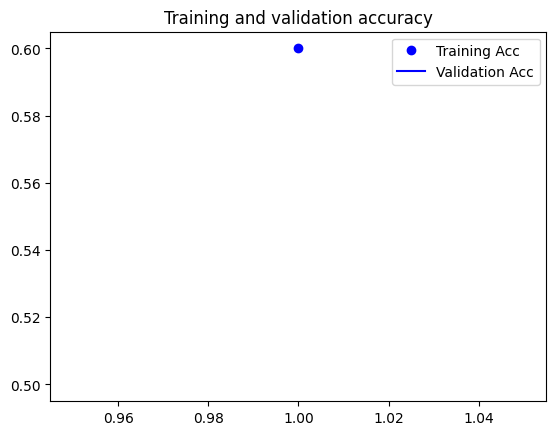

In [40]:
import matplotlib.pyplot as plt
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

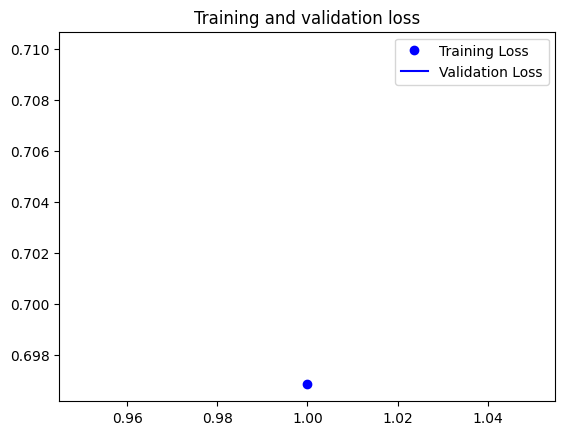

In [41]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
model.predict(test_generator)

1/1 [==============================] - 0s 283ms/step


array([[0.41864672],
       [0.42184904],
       [0.39261448],
       [0.40732497],
       [0.3842085 ],
       [0.41401735],
       [0.44077033],
       [0.37378544],
       [0.41021675],
       [0.4874471 ],
       [0.43075183],
       [0.44522184],
       [0.40616682],
       [0.4478436 ],
       [0.38507107],
       [0.4073294 ],
       [0.44088608],
       [0.43559515],
       [0.43567052],
       [0.39045742]], dtype=float32)

(20, 20, 20, 3)


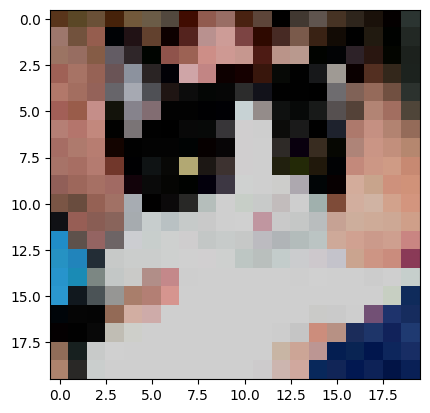

In [44]:
import matplotlib.pyplot as plt
for _ in range(len(test_generator)):
  img, label = test_generator.next()
  print(img.shape)
  plt.imshow(img[0]) # batch의 첫 번째
  plt.show()